Microsoft _Classifying_Cybersecurity_Incidents

Loading Train Dataset

In [7]:
import pandas as pd

# File path to the CSV file
file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\GUIDE_Train.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to confirm it's loaded correctly
print("Data loaded successfully! Here's a preview:")
print(df.head())


Data loaded successfully! Here's a preview:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFa

Loading Test Dataset

In [9]:
import pandas as pd

# File path to the CSV file
file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\GUIDE_Test.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to confirm it's loaded correctly
print("Data loaded successfully! Here's a preview:")
print(df.head())


C:\Users\sripathi\AppData\Local\Temp\ipykernel_14164\2289571591.py:7: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data loaded successfully! Here's a preview:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2  1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3    60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4   515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   

   DetectorId  AlertTitle           Category                  MitreTechniques  \
0         524         563    LateralMovement      T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                              NaN   
2        2932       10807    LateralMovement  T1021;T1027.002;T1027.005;T1105   
3           0           0      InitialAccess                  T1078;T1078.004   
4          27          18          Discovery                  T1087;T1087.002   

    IncidentGrade  ...  

A) Data Exploration

Training Dataset Exploration


Data Types:
Id: int64
OrgId: int64
IncidentId: int64
AlertId: int64
Timestamp: category
DetectorId: int64
AlertTitle: int64
Category: category
MitreTechniques: category
IncidentGrade: category
ActionGrouped: category
ActionGranular: category
EntityType: category
EvidenceRole: category
DeviceId: int64
Sha256: int64
IpAddress: int64
Url: int64
AccountSid: int64
AccountUpn: int64
AccountObjectId: int64
AccountName: int64
DeviceName: int64
NetworkMessageId: int64
EmailClusterId: float64
RegistryKey: int64
RegistryValueName: int64
RegistryValueData: int64
ApplicationId: int64
ApplicationName: int64
OAuthApplicationId: int64
ThreatFamily: category
FileName: int64
FolderPath: int64
ResourceIdName: int64
ResourceType: category
Roles: category
OSFamily: int64
OSVersion: int64
AntispamDirection: category
SuspicionLevel: category
LastVerdict: category
CountryCode: int64
State: int64
City: int64

Unique Value Counts (excluding null values):
                Column  Unique Values
0                 

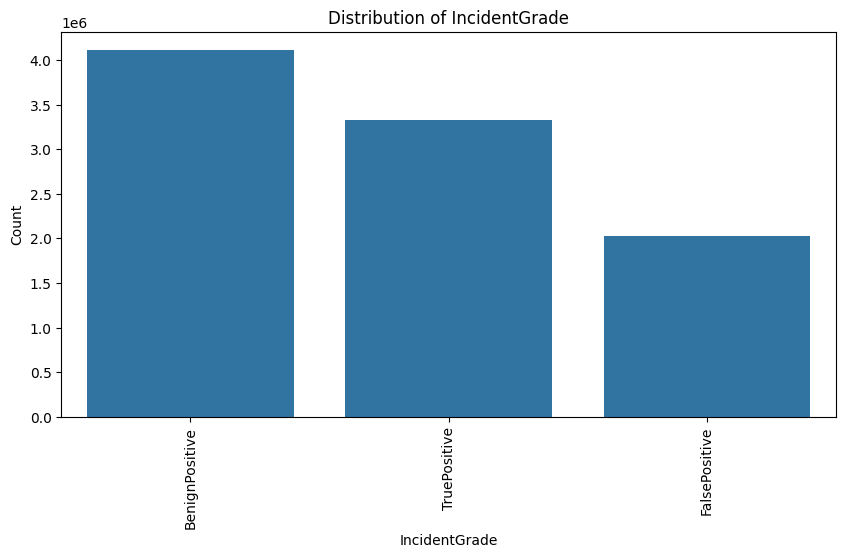

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Convert all object columns to categorical
df = df.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

# Initialize data containers
category_proportions = defaultdict(lambda: defaultdict(float))
unique_counts = defaultdict(int)
data_types = {}
target_counts = defaultdict(int)

# Process the full dataset
def process_data(df):
    global category_proportions, unique_counts, data_types, target_counts
    
    # Calculate data types for all columns
    for col in df.columns:
        data_types[col] = df[col].dtype
    
    # Calculate category proportions and unique value counts
    for col in df.columns:
        counts = df[col].value_counts(normalize=True) * 100
        for val, proportion in counts.items():
            category_proportions[col][val] += proportion
        
        # Count unique values excluding null values
        unique_counts[col] = df[col].dropna().nunique()
    
    # Target variable counts (IncidentGrade)
    if 'IncidentGrade' in df.columns:
        target_counts = df['IncidentGrade'].value_counts()

# Call the function to process data
process_data(df)

# Convert results to DataFrames for easier analysis
def get_top_categories(proportions_dict, top_n=15):
    top_categories = {}
    for col, proportions in proportions_dict.items():
        sorted_proportions = sorted(proportions.items(), key=lambda x: x[1], reverse=True)
        top_categories[col] = sorted_proportions[:top_n]
    return top_categories

def display_results():
    # Print data types
    print("\nData Types:")
    for col, dtype in data_types.items():
        print(f"{col}: {dtype}")
    
    # Print unique value counts excluding null values
    print("\nUnique Value Counts (excluding null values):")
    unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values'])
    print(unique_counts_df)
    
    # Print category proportions
    print("\nCategory Proportions:")
    top_categories = get_top_categories(category_proportions, top_n=15)
    for col, categories in top_categories.items():
        print(f"\nColumn: {col}")
        for val, proportion in categories:
            print(f"{val}: {proportion:.2f}%")
    
    # Print and plot target variable distribution
    if not target_counts.empty:  # Check if target_counts is not empty
        print("\nTarget Variable Distribution:")
        target_df = pd.DataFrame(list(target_counts.items()), columns=['IncidentGrade', 'Count'])
        print(target_df)
        
        # Plot the target variable distribution
        plt.figure(figsize=(10, 5))
        sns.barplot(x='IncidentGrade', y='Count', data=target_df)
        plt.title('Distribution of IncidentGrade')
        plt.xlabel('IncidentGrade')
        plt.ylabel('Count')
        plt.xticks(rotation=90)  # Rotate x labels for better readability
        plt.show()

# Call the function to display results
display_results()


Testing Dataset Exploration


Data Types:
Id: int64
OrgId: int64
IncidentId: int64
AlertId: int64
Timestamp: category
DetectorId: int64
AlertTitle: int64
Category: category
MitreTechniques: category
IncidentGrade: category
ActionGrouped: category
ActionGranular: category
EntityType: category
EvidenceRole: category
DeviceId: int64
Sha256: int64
IpAddress: int64
Url: int64
AccountSid: int64
AccountUpn: int64
AccountObjectId: int64
AccountName: int64
DeviceName: int64
NetworkMessageId: int64
EmailClusterId: float64
RegistryKey: int64
RegistryValueName: int64
RegistryValueData: int64
ApplicationId: int64
ApplicationName: int64
OAuthApplicationId: int64
ThreatFamily: category
FileName: int64
FolderPath: int64
ResourceIdName: int64
ResourceType: category
Roles: category
OSFamily: int64
OSVersion: int64
AntispamDirection: category
SuspicionLevel: category
LastVerdict: category
CountryCode: int64
State: int64
City: int64
Usage: category

Unique Value Counts (excluding null values):
                Column  Unique Values
0 

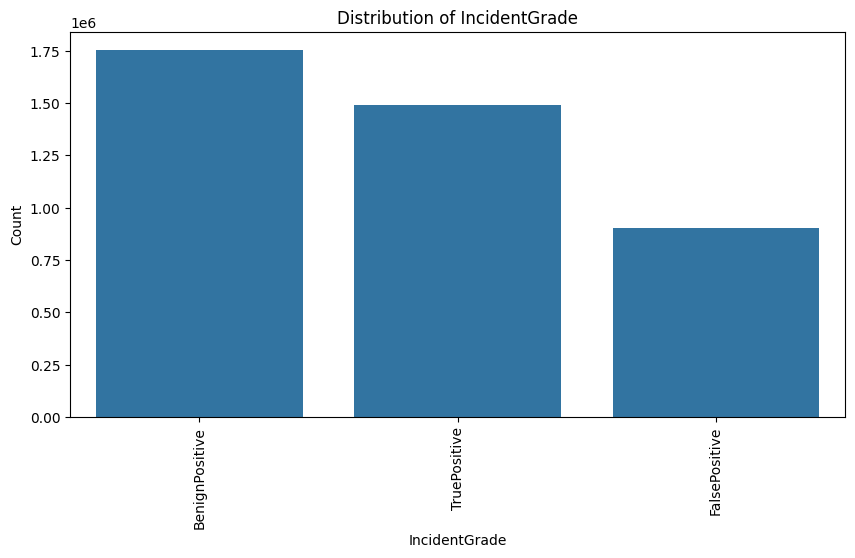

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Convert all object columns to categorical
df = df.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

# Initialize data containers
category_proportions = defaultdict(lambda: defaultdict(float))
unique_counts = defaultdict(int)
data_types = {}
target_counts = defaultdict(int)

# Process the full dataset
def process_data(df):
    global category_proportions, unique_counts, data_types, target_counts
    
    # Calculate data types for all columns
    for col in df.columns:
        data_types[col] = df[col].dtype
    
    # Calculate category proportions and unique value counts
    for col in df.columns:
        counts = df[col].value_counts(normalize=True) * 100
        for val, proportion in counts.items():
            category_proportions[col][val] += proportion
        
        # Count unique values excluding null values
        unique_counts[col] = df[col].dropna().nunique()
    
    # Target variable counts (IncidentGrade)
    if 'IncidentGrade' in df.columns:
        target_counts = df['IncidentGrade'].value_counts()

# Call the function to process data
process_data(df)

# Convert results to DataFrames for easier analysis
def get_top_categories(proportions_dict, top_n=15):
    top_categories = {}
    for col, proportions in proportions_dict.items():
        sorted_proportions = sorted(proportions.items(), key=lambda x: x[1], reverse=True)
        top_categories[col] = sorted_proportions[:top_n]
    return top_categories

def display_results():
    # Print data types
    print("\nData Types:")
    for col, dtype in data_types.items():
        print(f"{col}: {dtype}")
    
    # Print unique value counts excluding null values
    print("\nUnique Value Counts (excluding null values):")
    unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values'])
    print(unique_counts_df)
    
    # Print category proportions
    print("\nCategory Proportions:")
    top_categories = get_top_categories(category_proportions, top_n=15)
    for col, categories in top_categories.items():
        print(f"\nColumn: {col}")
        for val, proportion in categories:
            print(f"{val}: {proportion:.2f}%")
    
    # Print and plot target variable distribution
    if not target_counts.empty:  # Check if target_counts is not empty
        print("\nTarget Variable Distribution:")
        target_df = pd.DataFrame(list(target_counts.items()), columns=['IncidentGrade', 'Count'])
        print(target_df)
        
        # Plot the target variable distribution
        plt.figure(figsize=(10, 5))
        sns.barplot(x='IncidentGrade', y='Count', data=target_df)
        plt.title('Distribution of IncidentGrade')
        plt.xlabel('IncidentGrade')
        plt.ylabel('Count')
        plt.xticks(rotation=90)  # Rotate x labels for better readability
        plt.show()

# Call the function to display results
display_results()


B) Data Preprocessing

Preprocessing Train Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Feature engineering for timestamp column
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['Year'] = df['Timestamp'].dt.year
        df['Month'] = df['Timestamp'].dt.month
        df['Day'] = df['Timestamp'].dt.day
        df['Hour'] = df['Timestamp'].dt.hour
        df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
        df.drop(columns=['Timestamp'], inplace=True)
        print("Feature engineering for timestamp column completed.")

    # Drop columns with more than 80% missing values
    missing_threshold = 0.8
    columns_to_drop = df.columns[df.isnull().mean() >= missing_threshold]
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Dropped columns with more than 80% missing values: {list(columns_to_drop)}")

    # Step 1.3.a: Convert all columns to categorical type
    for col in df.columns:
        df[col] = df[col].astype('category')
    print("Converted all columns to categorical type.")

    # Step 1.3.b: Handle missing values by filling object columns with random values from available non-missing values
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].isnull().any():
            unique_values = df[col].dropna().unique()
            num_missing = df[col].isnull().sum()
            fill_values = np.random.choice(unique_values, num_missing, replace=True)
            df.loc[df[col].isnull(), col] = fill_values
    print("Handled missing values.")

    return df

def handle_category_cardinality(df, target_variable='IncidentGrade'):
    # Define maximum number of categories
    max_categories = 20  # Including "Other"

    for col in df.columns:
        df[col] = df[col].astype('category')
    print("Converted all columns to categorical type.")
    
    for col in df.columns:
        freq = df[col].value_counts()
        if len(freq) > 20:  # If unique value count > 20
            top_categories = freq.nlargest(max_categories - 1).index
            df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')
            print(f"Processed column '{col}': limited categories to top {max_categories - 1} with 'Other'.")
        # Columns with <= 20 unique values remain unchanged
        else:
            print(f"Column '{col}' has {len(freq)} unique values and remains unchanged.")
    
    return df

def apply_label_encoding(df):
    # Initialize the LabelEncoder
    le = LabelEncoder()
    
    # Apply Label Encoding to each categorical or object column
    for col in df.select_dtypes(include=['object', 'category']).columns:
        # Ensure the column is of type string
        df[col] = df[col].astype(str)
        
        # Apply label encoding to the column
        df[col] = le.fit_transform(df[col])
        print(f"Label encoded column '{col}'.")
    
    return df

def save_to_csv(df, output_file_path):
    # Save the DataFrame to CSV locally
    df.to_csv(output_file_path, index=False)
    print(f"File saved locally to {output_file_path}")

# Preprocessing pipeline function without reloading df
def run_preprocessing_pipeline(df, output_file_path):
    print("Step 1: Preprocessing data...")
    df = preprocess_data(df)

    print("Step 2: Handling category cardinality...")
    df = handle_category_cardinality(df)

    print("Step 3: Applying label encoding...")
    df = apply_label_encoding(df)

    print("Step 4: Saving final preprocessed data locally...")
    save_to_csv(df, output_file_path)

    print("Step 5: Displaying unique value counts for each column...")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"Column '{col}' has {unique_count} unique values.")

    print("Step 6: Displaying final dataset overview...")
    print("Dataset Overview:")
    print(df.info())
    print("First 5 Rows of the Dataset:")
    print(df.head())

    print("Preprocessing pipeline completed successfully.")


# Define the output file path
output_file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Preprocessed_Train_data.csv"  # Output file path

# Run the preprocessing pipeline on the already loaded df
run_preprocessing_pipeline(df, output_file_path)


Step 1: Preprocessing data...
Feature engineering for timestamp column completed.
Dropped columns with more than 80% missing values: ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel']
Converted all columns to categorical type.
Handled missing values.
Step 2: Handling category cardinality...
Converted all columns to categorical type.
Processed column 'Id': limited categories to top 19 with 'Other'.
Processed column 'OrgId': limited categories to top 19 with 'Other'.
Processed column 'IncidentId': limited categories to top 19 with 'Other'.
Processed column 'AlertId': limited categories to top 19 with 'Other'.
Processed column 'DetectorId': limited categories to top 19 with 'Other'.
Processed column 'AlertTitle': limited categories to top 19 with 'Other'.
Column 'Category' has 20 unique values and remains unchanged.
Processed column 'MitreTechniques': limited categories to top 19 with 'Other'.
Column 'Incid

Preprocessing Test Dataset

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Feature engineering for timestamp column
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['Year'] = df['Timestamp'].dt.year
        df['Month'] = df['Timestamp'].dt.month
        df['Day'] = df['Timestamp'].dt.day
        df['Hour'] = df['Timestamp'].dt.hour
        df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
        df.drop(columns=['Timestamp','Usage'], inplace=True)
        print("Feature engineering for timestamp column completed.")

    # Drop columns with more than 80% missing values
    missing_threshold = 0.8
    columns_to_drop = df.columns[df.isnull().mean() >= missing_threshold]
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Dropped columns with more than 80% missing values: {list(columns_to_drop)}")

    # Step 1.3.a: Convert all columns to categorical type
    for col in df.columns:
        df[col] = df[col].astype('category')
    print("Converted all columns to categorical type.")

    # Step 1.3.b: Handle missing values by filling object columns with random values from available non-missing values
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].isnull().any():
            unique_values = df[col].dropna().unique()
            num_missing = df[col].isnull().sum()
            fill_values = np.random.choice(unique_values, num_missing, replace=True)
            df.loc[df[col].isnull(), col] = fill_values
    print("Handled missing values.")

    return df

def handle_category_cardinality(df, target_variable='IncidentGrade'):
    # Define maximum number of categories
    max_categories = 20  # Including "Other"

    for col in df.columns:
        df[col] = df[col].astype('category')
    print("Converted all columns to categorical type.")
    
    for col in df.columns:
        freq = df[col].value_counts()
        if len(freq) > 20:  # If unique value count > 20
            top_categories = freq.nlargest(max_categories - 1).index
            df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')
            print(f"Processed column '{col}': limited categories to top {max_categories - 1} with 'Other'.")
        # Columns with <= 20 unique values remain unchanged
        else:
            print(f"Column '{col}' has {len(freq)} unique values and remains unchanged.")
    
    return df

def apply_label_encoding(df):
    # Initialize the LabelEncoder
    le = LabelEncoder()
    
    # Apply Label Encoding to each categorical or object column
    for col in df.select_dtypes(include=['object', 'category']).columns:
        # Ensure the column is of type string
        df[col] = df[col].astype(str)
        
        # Apply label encoding to the column
        df[col] = le.fit_transform(df[col])
        print(f"Label encoded column '{col}'.")
    
    return df

def save_to_csv(df, output_file_path):
    # Save the DataFrame to CSV locally
    df.to_csv(output_file_path, index=False)
    print(f"File saved locally to {output_file_path}")

# Preprocessing pipeline function without reloading df
def run_preprocessing_pipeline(df, output_file_path):
    print("Step 1: Preprocessing data...")
    df = preprocess_data(df)

    print("Step 2: Handling category cardinality...")
    df = handle_category_cardinality(df)

    print("Step 3: Applying label encoding...")
    df = apply_label_encoding(df)

    print("Step 4: Saving final preprocessed data locally...")
    save_to_csv(df, output_file_path)

    print("Step 5: Displaying unique value counts for each column...")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"Column '{col}' has {unique_count} unique values.")

    print("Step 6: Displaying final dataset overview...")
    print("Dataset Overview:")
    print(df.info())
    print("First 5 Rows of the Dataset:")
    print(df.head())

    print("Preprocessing pipeline completed successfully.")


# Define the output file path
output_file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Preprocessed_Test_data.csv"  # Output file path

# Run the preprocessing pipeline on the already loaded df
run_preprocessing_pipeline(df, output_file_path)


Step 1: Preprocessing data...
Feature engineering for timestamp column completed.
Dropped columns with more than 80% missing values: ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel']
Converted all columns to categorical type.
Handled missing values.
Step 2: Handling category cardinality...
Converted all columns to categorical type.
Processed column 'Id': limited categories to top 19 with 'Other'.
Processed column 'OrgId': limited categories to top 19 with 'Other'.
Processed column 'IncidentId': limited categories to top 19 with 'Other'.
Processed column 'AlertId': limited categories to top 19 with 'Other'.
Processed column 'DetectorId': limited categories to top 19 with 'Other'.
Processed column 'AlertTitle': limited categories to top 19 with 'Other'.
Column 'Category' has 19 unique values and remains unchanged.
Processed column 'MitreTechniques': limited categories to top 19 with 'Other'.
Column 'Incid

Feature Selection from Preprocessed Train Dataset

Selected Features: ['OrgId', 'DetectorId', 'Hour', 'Category', 'AlertTitle', 'Day', 'MitreTechniques', 'DayOfWeek', 'EntityType', 'CountryCode', 'LastVerdict', 'Id', 'Month', 'IncidentId', 'FolderPath', 'City', 'AccountUpn', 'State', 'EvidenceRole', 'IpAddress', 'IncidentGrade']
Shape of the final dataset: (9516837, 21)


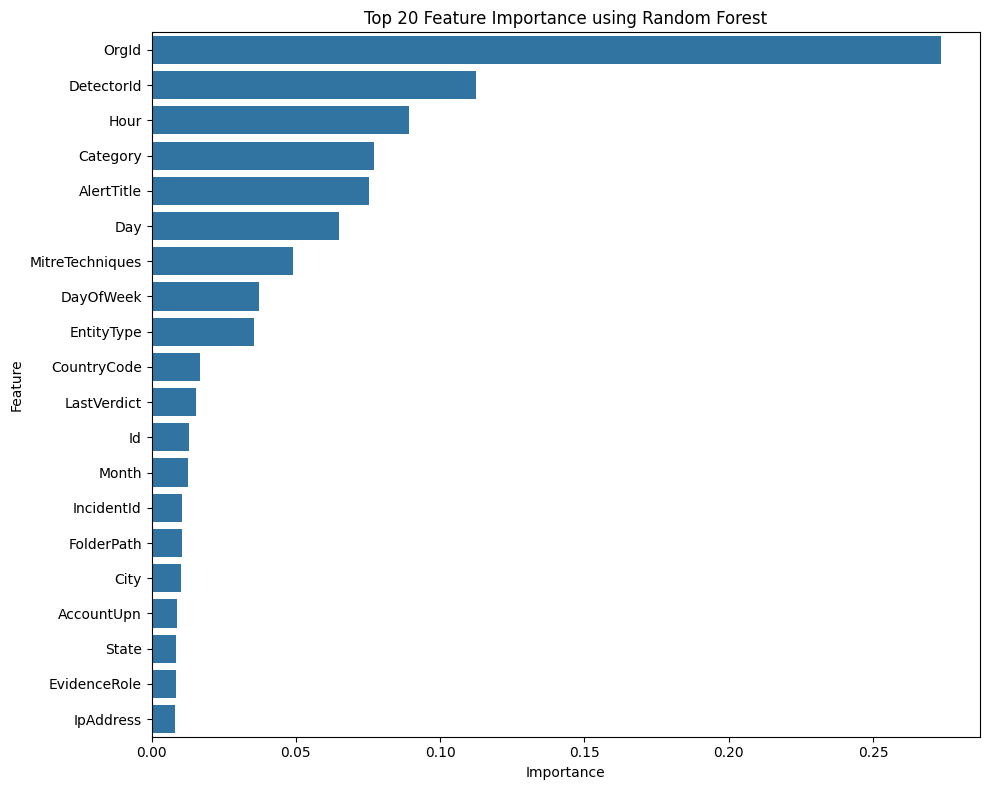

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Preprocessed_Train_data.csv"
df = pd.read_csv(data_path)

# Split features (X) and target (y)
X = df.drop('IncidentGrade', axis=1)
y = df['IncidentGrade']

# Initialize and fit Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)['Feature'].values

# Create a new DataFrame with the top 20 features and the target column
df_selected = df[top_20_features].copy()
df_selected['IncidentGrade'] = y  # Adding the target column

# Save the selected features and target to a new CSV file
selected_data_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Selected_Top20_Features.csv"
df_selected.to_csv(selected_data_path, index=False)

# Print final column names and shape of the final dataset
print("Selected Features:", df_selected.columns.tolist())
print("Shape of the final dataset:", df_selected.shape)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(20))  # Top 20 features
plt.title('Top 20 Feature Importance using Random Forest')
plt.tight_layout()
plt.show()


Preparing Test Dataset

In [5]:
# Import necessary libraries
import pandas as pd

# File paths
input_file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Preprocessed_Test_data.csv"
output_file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Testing_Dataset.csv"

# Columns to select
columns_to_select = ['OrgId', 'DetectorId', 'Hour', 'Category', 'AlertTitle', 'Day', 
                    'MitreTechniques', 'DayOfWeek', 'EntityType', 'CountryCode', 
                    'LastVerdict', 'Id', 'Month', 'IncidentId', 'FolderPath', 'City',
                    'AccountUpn', 'State', 'EvidenceRole', 'IpAddress', 'IncidentGrade']
# Load the test dataset
df_test = pd.read_csv(input_file_path)

# Select the desired columns
df_selected = df_test[columns_to_select]

# Save the new dataset to a CSV file
df_selected.to_csv(output_file_path, index=False)

print(f"New dataset saved to {output_file_path}")


New dataset saved to D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Testing_Dataset.csv


C) Data Splitting

Train and Validation Data Split of Train dataset

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Local file paths
file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Selected_Top20_Features.csv"  # Input file
train_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\train_set.csv"  # Output train set
val_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\val_set.csv"  # Output validation set

# Load the data from the local CSV file
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

# Train-Test Split with Stratify
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the splits back to DataFrames for saving
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['IncidentGrade'] = y_train.values

df_val = pd.DataFrame(X_val, columns=X.columns)
df_val['IncidentGrade'] = y_val.values

# Save training and validation sets to local CSV files
df_train.to_csv(train_output_path, index=False)
df_val.to_csv(val_output_path, index=False)

print(f"Training set saved to {train_output_path} - Shape: {df_train.shape}")
print(f"Validation set saved to {val_output_path} - Shape: {df_val.shape}")

print("Data splitting complete!")


Training set saved to D:\Guvi\projects\Microsoft_Cybersecurity_Classification\train_set.csv - Shape: (7613469, 21)
Validation set saved to D:\Guvi\projects\Microsoft_Cybersecurity_Classification\val_set.csv - Shape: (1903368, 21)
Data splitting complete!


Train and Validation Data Split of Test dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Local file paths
file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Testing_Dataset.csv" # Input file
train_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\test_set.csv"  # Output train set
val_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\validation_set.csv"  # Output validation set

# Load the data from the local CSV file
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

# Train-Test Split with Stratify
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the splits back to DataFrames for saving
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['IncidentGrade'] = y_train.values

df_val = pd.DataFrame(X_val, columns=X.columns)
df_val['IncidentGrade'] = y_val.values

# Save training and validation sets to local CSV files
df_train.to_csv(train_output_path, index=False)
df_val.to_csv(val_output_path, index=False)

print(f"Training set saved to {train_output_path} - Shape: {df_train.shape}")
print(f"Validation set saved to {val_output_path} - Shape: {df_val.shape}")

print("Data splitting complete!")


Training set saved to D:\Guvi\projects\Microsoft_Cybersecurity_Classification\test_set.csv - Shape: (3318393, 21)
Validation set saved to D:\Guvi\projects\Microsoft_Cybersecurity_Classification\validation_set.csv - Shape: (829599, 21)
Data splitting complete!


Loading Data for Model Training

In [2]:
import pandas as pd

# File paths
train_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\train_set.csv"
val_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\val_set.csv"

# Load the datasets
train_data = pd.read_csv(train_output_path)
val_data = pd.read_csv(val_output_path)

# Print the shape of the datasets
print(f"Training dataset shape: {train_data.shape}")
print(f"Validation dataset shape: {val_data.shape}")

# Confirmation message
print("Datasets loaded successfully!")


Training dataset shape: (7613469, 21)
Validation dataset shape: (1903368, 21)
Datasets loaded successfully!


D) Model Selection and Training

Baseline Models

Logestic Regression

Training data loaded with shape: (7613469, 20), Validation data loaded with shape: (1903368, 20)
Data sets are loaded.
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.78      0.65    822164
           1       0.51      0.21      0.30    406393
           2       0.67      0.60      0.63    664543
           3       0.03      0.00      0.00     10268

    accuracy                           0.59   1903368
   macro avg       0.44      0.40      0.40   1903368
weighted avg       0.59      0.59      0.57   1903368

Logistic Regression Confusion Matrix:
[[641661  56150 124353      0]
 [247112  86922  72359      0]
 [242169  26935 395408     31]
 [  9793    337    137      1]]


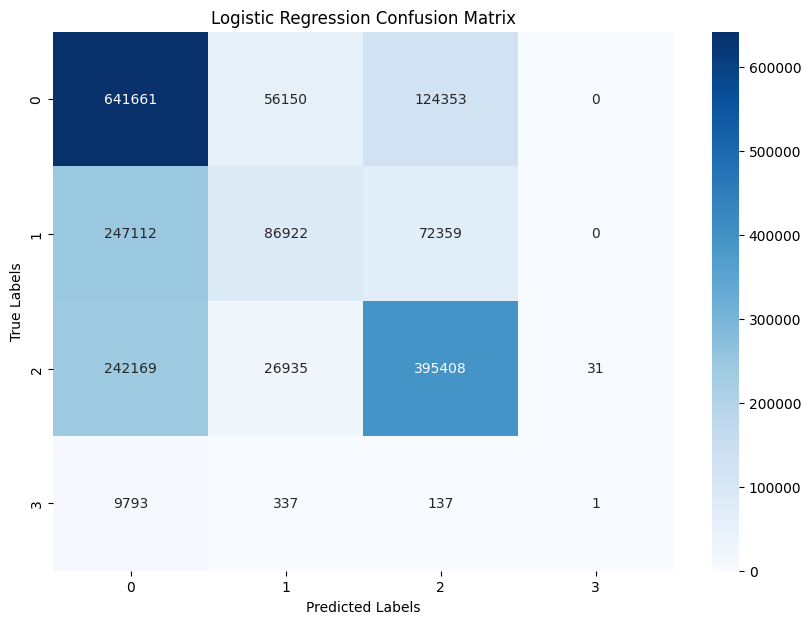

Logistic Regression model training and evaluation complete!


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_val_scaled)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
conf_matrix_log_reg = confusion_matrix(y_val, y_pred_log_reg)
print(conf_matrix_log_reg)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression model training and evaluation complete!")


Decision Tree Model

Training data loaded with shape: (7613469, 20), Validation data loaded with shape: (1903368, 20)
Data sets are loaded.
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82    822164
           1       0.79      0.65      0.72    406393
           2       0.87      0.77      0.82    664543
           3       0.52      0.16      0.25     10268

    accuracy                           0.80   1903368
   macro avg       0.74      0.62      0.65   1903368
weighted avg       0.80      0.80      0.79   1903368

Decision Tree Confusion Matrix:
[[740633  40702  40110    719]
 [106071 265515  34256    551]
 [127958  26736 509607    242]
 [  5703   1477   1427   1661]]


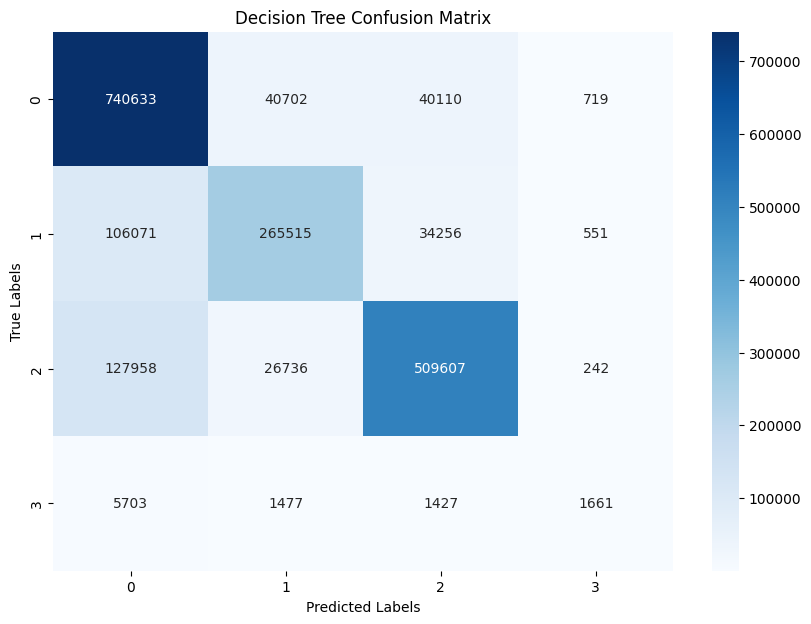

Decision Tree model training and evaluation complete!


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Train Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_val)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

print("Decision Tree Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
print(conf_matrix_dt)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision Tree model training and evaluation complete!")


Advanced Models

Random Forest Model

Training data loaded with shape: (7613469, 20), Validation data loaded with shape: (1903368, 20)
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=25.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=14.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=13.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 9.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 8.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 8.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=12.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=13.4min
[CV] END max_depth=None, min_sampl

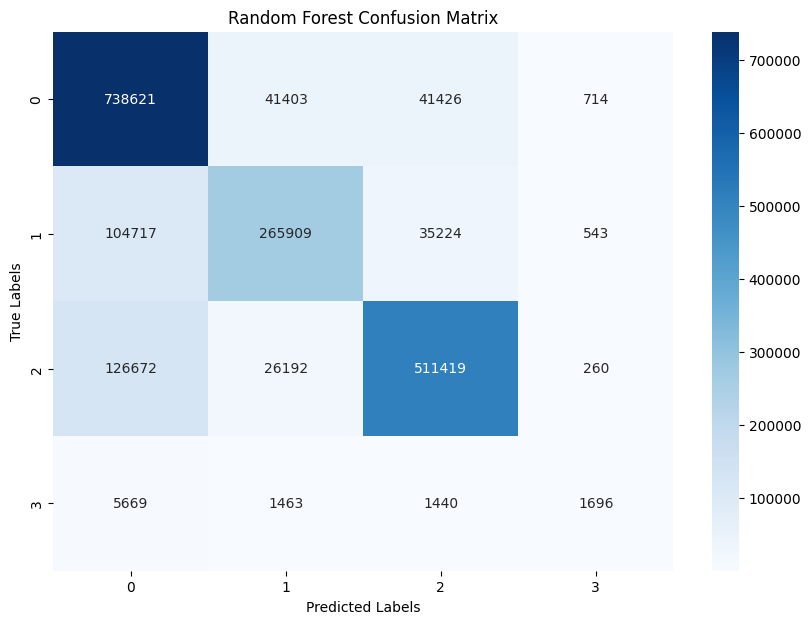

Random Forest model training and evaluation complete!


In [3]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=3,  # Number of parameter settings to sample
    cv=3, 
    n_jobs=1, 
    verbose=2, 
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Evaluate the best model
y_pred_rf = best_rf.predict(X_val)

print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

print("Random Forest Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Random Forest model training and evaluation complete!")


XG Boost 

Training data loaded with shape: (7613469, 20), Validation data loaded with shape: (1903368, 20)


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:43:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:47:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encod

Cross-validation scores: [0.75312834 0.75337986 0.75627276 0.75289257 0.75240774]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.95      0.79    822164
           1       0.86      0.46      0.60    406393
           2       0.89      0.71      0.79    664543
           3       0.68      0.08      0.14     10268

    accuracy                           0.75   1903368
   macro avg       0.77      0.55      0.58   1903368
weighted avg       0.79      0.75      0.74   1903368

Confusion Matrix:
[[780743  15875  25397    149]
 [186382 186065  33774    172]
 [180575  14574 469337     57]
 [  8090     96   1285    797]]


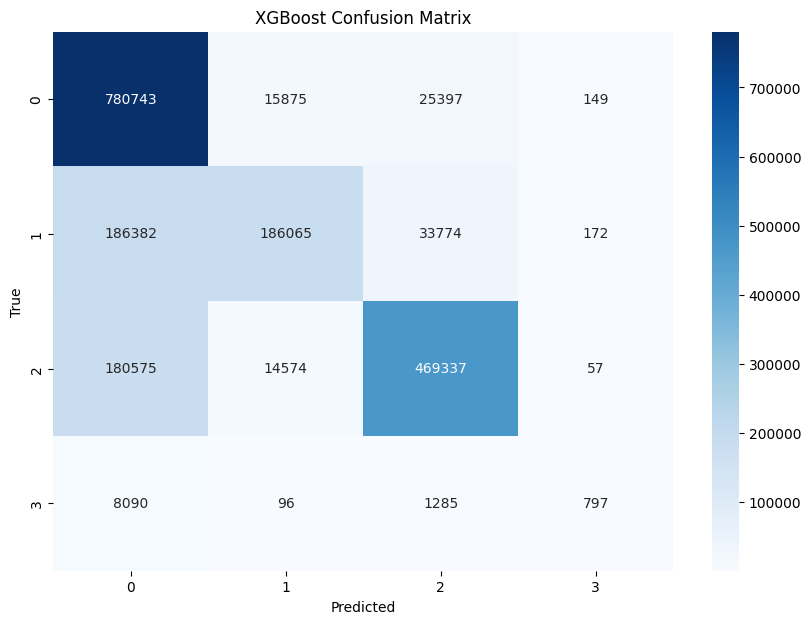

In [4]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# XGBoost with Random Search for Hyperparameter Tuning
param_dist = {'n_estimators': [50], 'max_depth': [10], 'learning_rate': [0.1]}
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=3, cv=3, verbose=1, n_jobs=1)
random_search.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

# Prediction
y_pred_xgb = random_search.best_estimator_.predict(X_val)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()


Light GBM

Training data loaded with shape: (7613469, 20), Validation data loaded with shape: (1903368, 20)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.747937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 7613469, number of used features: 20
[LightGBM] [Info] Start training from score -0.839441
[LightGBM] [Info] Start training from score -1.544058
[LightGBM] [Info] Start training from score -1.052281
[LightGBM] [Info] Start training from score -5.222348
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.912439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Inf

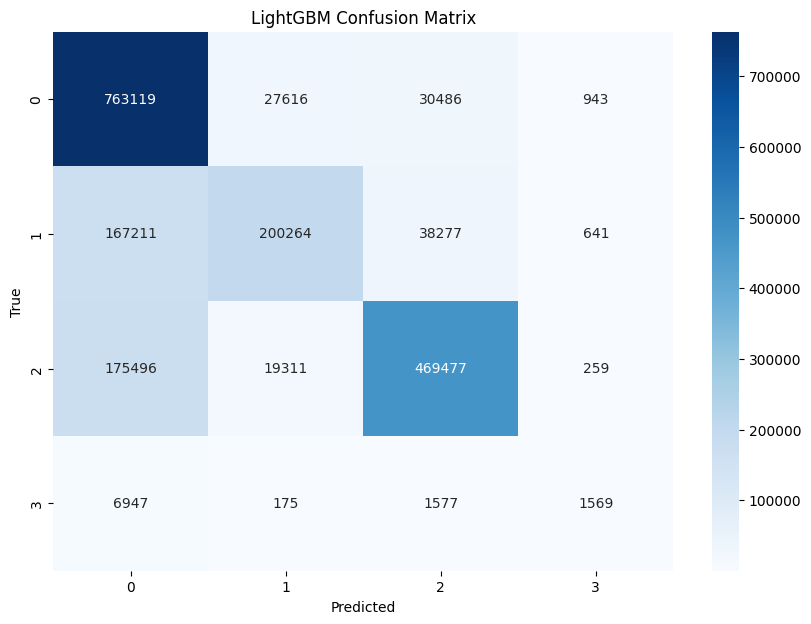

In [5]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# LightGBM with Grid Search for Hyperparameter Tuning
param_grid = {'n_estimators': [50], 'max_depth': [10, 20], 'learning_rate': [0.1]}
lgbm = lgb.LGBMClassifier(random_state=42)
grid_search = GridSearchCV(lgbm, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

# Prediction
y_pred_lgbm = grid_search.best_estimator_.predict(X_val)

# Evaluation
print("LightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgbm))

# Confusion Matrix
conf_matrix_lgbm = confusion_matrix(y_val, y_pred_lgbm)
print("Confusion Matrix:")
print(conf_matrix_lgbm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("LightGBM Confusion Matrix")
plt.show()


Neural Network

Training data loaded with shape: (7613469, 20), Validation data loaded with shape: (1903368, 20)


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 188s 4ms/step - accuracy: 0.6595 - loss: 0.7591 - val_accuracy: 0.7157 - val_loss: 0.6416
Epoch 2/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7234 - loss: 0.6273 - val_accuracy: 0.7346 - val_loss: 0.6093
Epoch 3/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7338 - loss: 0.6057 - val_accuracy: 0.7385 - val_loss: 0.6034
Epoch 4/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.7378 - loss: 0.5963 - val_accuracy: 0.7373 - val_loss: 0.5954
Epoch 5/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7403 - loss: 0.5906 - val_accuracy: 0.7377 - val_loss: 0.5930
Epoch 6/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7414 - loss: 0.5866 - val_accuracy: 0.7420 - val_loss: 0.5860
Epoch 7/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7428 - loss: 0.5837 - val_accuracy: 0.7436 - val_loss: 0.5860
Epoch 8/25
13384/13384 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy:

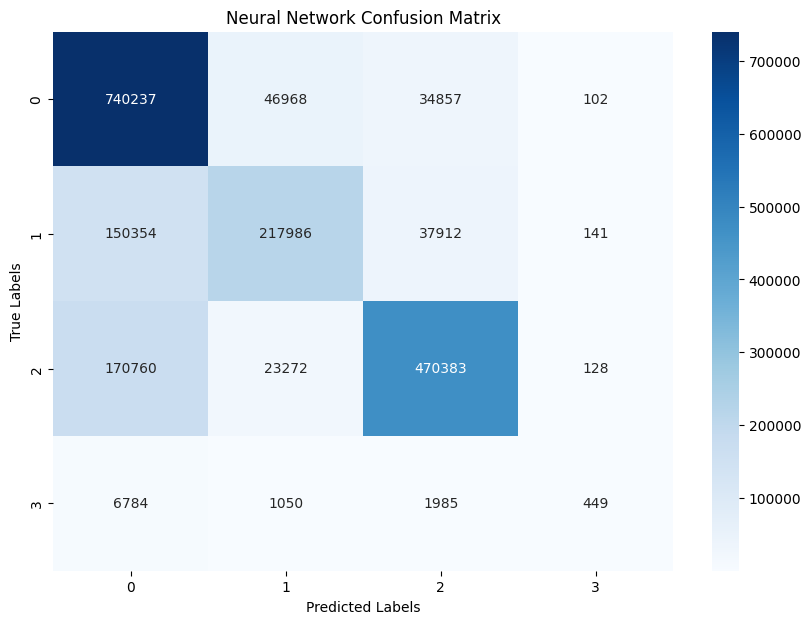

Neural Network model training and evaluation complete!


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# Scaling for Neural Network
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert target to categorical
num_classes = y_train.nunique()
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

# Build Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Train Neural Network with early stopping and reduced epochs
model.fit(X_train_scaled, y_train_cat, epochs=25, batch_size=512, 
          validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Predict and evaluate
y_pred_cat = model.predict(X_val_scaled)
y_pred = y_pred_cat.argmax(axis=1)

print("Neural Network Classification Report:")
print(classification_report(y_val, y_pred))

print("Neural Network Confusion Matrix:")
conf_matrix_nn = confusion_matrix(y_val, y_pred)
print(conf_matrix_nn)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Neural Network Confusion Matrix")
plt.show()

print("Neural Network model training and evaluation complete!")


Comparison of Advanced Models

Comparison Table:
         Model  Accuracy  Macro-F1 Score  Precision (Macro)  Recall (Macro)
 Random Forest      0.80            0.65               0.74            0.62
       XGBoost      0.75            0.58               0.77            0.55
      LightGBM      0.75            0.60               0.71            0.57
Neural Network      0.75            0.57               0.77            0.55

Best Model Based on Macro-F1 Score:
Model                Random Forest
Accuracy                       0.8
Macro-F1 Score                0.65
Precision (Macro)             0.74
Recall (Macro)                0.62
Name: 0, dtype: object


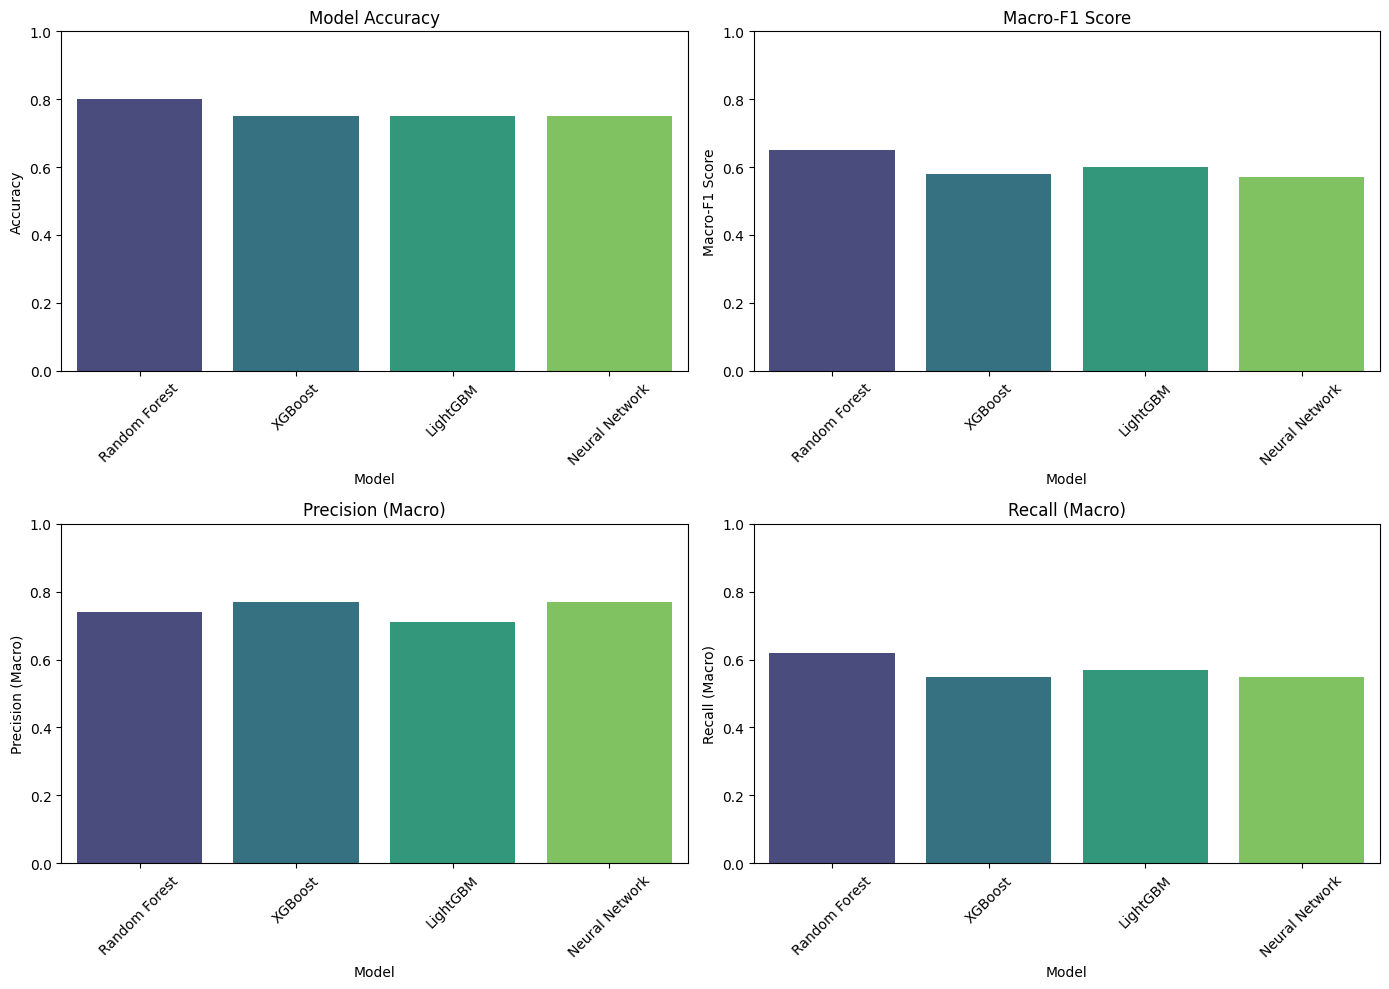

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for comparison based on your provided outputs
data = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM', 'Neural Network'],
    'Accuracy': [0.80, 0.75, 0.75, 0.75],  # Accuracy values from the classification reports
    'Macro-F1 Score': [0.65, 0.58, 0.60, 0.57],  # F1-scores for the macro avg from classification reports
    'Precision (Macro)': [0.74, 0.77, 0.71, 0.77],  # Macro Precision from classification reports
    'Recall (Macro)': [0.62, 0.55, 0.57, 0.55],  # Macro Recall from classification reports
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['Macro-F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on Macro-F1 Score:")
print(best_model)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot for Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Macro-F1 Score
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Macro-F1 Score', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Macro-F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Precision (Macro)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Precision (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Precision (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Recall (Macro)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Recall (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Recall (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()



Selected Advanced Model - Random Forest with Hyperparameter Tuning and Class Imbalance Handling

Training data loaded with shape: (7613469, 20), Validation data loaded with shape: (1903368, 20)
Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\imble

Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    822164
           1       0.67      0.69      0.68    406393
           2       0.89      0.72      0.79    664543
           3       0.07      0.97      0.13     10268

    accuracy                           0.74   1903368
   macro avg       0.61      0.79      0.60   1903368
weighted avg       0.79      0.74      0.76   1903368

Balanced Random Forest Confusion Matrix:
[[635343  85961  33373  67487]
 [ 68863 282210  24759  30561]
 [104853  50161 476100  33429]
 [   131    107    104   9926]]


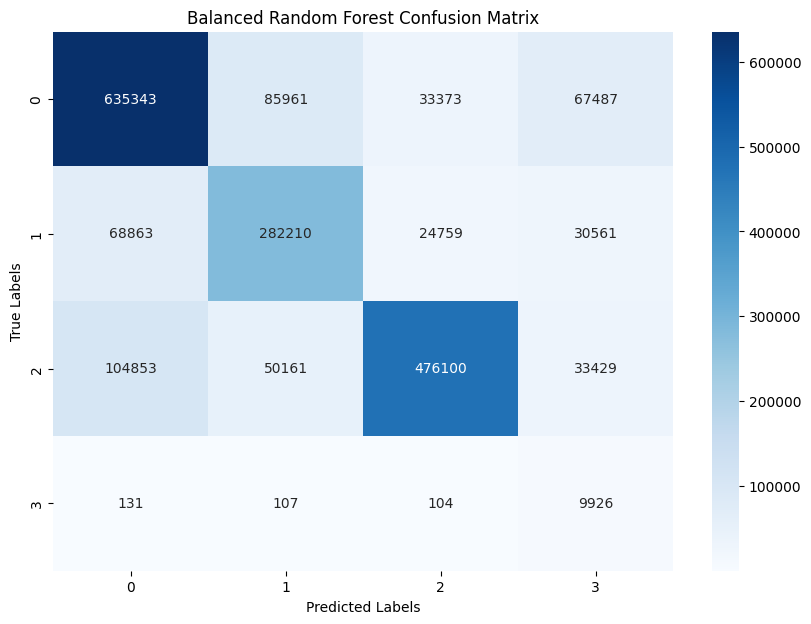

Best model saved to D:\Guvi\projects\Microsoft_Cybersecurity_Classification\best_rf_balanced_model.pkl


In [2]:
import pandas as pd
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# File paths
train_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\train_set.csv"
val_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\val_set.csv"

# Load the datasets
train_data = pd.read_csv(train_output_path)
val_data = pd.read_csv(val_output_path)

# Separate features and target
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_val = val_data.drop(columns=['IncidentGrade'])
y_val = val_data['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],  # Increased number of trees
    'max_depth': [10, 20],       # Tree depth
    'min_samples_split': [5, 10], # Minimum samples to split an internal node
    'min_samples_leaf': [2, 4],   # Minimum samples at leaf node
    'max_features': ['auto', 'sqrt'] # Number of features considered for split
}

# Initialize BalancedRandomForestClassifier
rf_balanced = BalancedRandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_balanced, 
    param_distributions=param_dist, 
    n_iter=5,  # Number of parameter settings to sample
    cv=3,      # 3-fold cross-validation
    n_jobs=-1, # Use all available cores
    verbose=2, 
    random_state=42
)

# Fit the model with RandomizedSearchCV
print("Starting hyperparameter tuning with RandomizedSearchCV...")
random_search.fit(X_train, y_train)
best_rf_balanced = random_search.best_estimator_

# Evaluate the best model
y_pred_rf_balanced = best_rf_balanced.predict(X_val)

# Classification report
print("Balanced Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf_balanced))

# Confusion matrix
conf_matrix_rf_balanced = confusion_matrix(y_val, y_pred_rf_balanced)
print("Balanced Random Forest Confusion Matrix:")
print(conf_matrix_rf_balanced)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf_balanced, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=best_rf_balanced.classes_, yticklabels=best_rf_balanced.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Balanced Random Forest Confusion Matrix")
plt.show()

# Save the best model after tuning
model_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\best_rf_balanced_model.pkl"
joblib.dump(best_rf_balanced, model_output_path)

print(f"Best model saved to {model_output_path}")


Feature Importance and Error analysis

Calculating Random Forest Built-in Feature Importance...
Top 10 Important Features:
            Feature  Importance
0             OrgId    0.215460
8        EntityType    0.158494
1        DetectorId    0.081728
4        AlertTitle    0.078549
16       AccountUpn    0.071841
3          Category    0.071542
2              Hour    0.067798
5               Day    0.054869
6   MitreTechniques    0.044504
18     EvidenceRole    0.036861


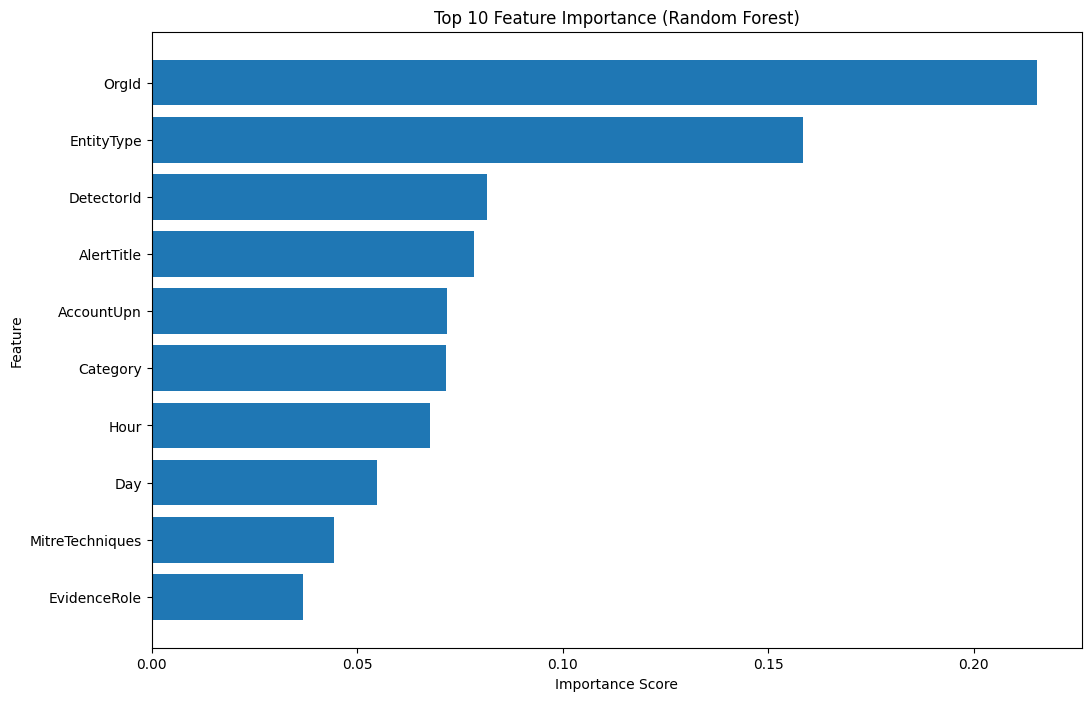

Number of misclassifications: 499789
Sample misclassified cases:
    OrgId  DetectorId  Hour  Category  AlertTitle  Day  MitreTechniques  \
1      19          15     8        10          14    1               16   
5      19          11     7         1          11   12               20   
6      19           1    12        10           1   18               18   
7      19          11    15         1          11   12               20   
11     19          19     8        10           9   12               20   

    DayOfWeek  EntityType  CountryCode  LastVerdict  Id  Month  IncidentId  \
1           1           8           11            3  19      7          19   
5           0          18           11            4  19      7          19   
6           6           8           11            4  19      7          19   
7           0          18           11            4  19      7          19   
11          0           9           11            5  19      7          19   

    FolderPath 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import load

# Load prepared data
X_train = pd.read_csv(r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\train_set.csv")
y_train = X_train.pop('IncidentGrade')
X_val = pd.read_csv(r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\val_set.csv")
y_val = X_val.pop('IncidentGrade')

# Load the trained Random Forest model
Trained_Model = load(r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\best_rf_balanced_model.pkl")

# Calculate feature importance using Random Forest
print("Calculating Random Forest Built-in Feature Importance...")
feature_importances = Trained_Model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_val.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

# Make predictions
y_pred = Trained_Model.predict(X_val)

# Error Analysis
misclassified_indices = np.where(y_pred != y_val)[0]
num_misclassified = len(misclassified_indices)
print(f"Number of misclassifications: {num_misclassified}")

# Display sample of misclassified cases
print("Sample misclassified cases:")
print(X_val.iloc[misclassified_indices].head())

# Evaluate the model's predictions
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Final Evaluation on Test Set

Selected model Evaluation with Test dataset 

Test Set Results:
Macro-F1 Score: 0.5138
Macro Precision: 0.5470


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Macro Recall: 0.4899

Classification Report (Test Set):


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

              precision    recall  f1-score   support

           0       0.70      0.75      0.72   1752940
           1       0.59      0.54      0.56    902698
           2       0.90      0.67      0.77   1492354
           3       0.00      0.00      0.00         0

    accuracy                           0.68   4147992
   macro avg       0.55      0.49      0.51   4147992
weighted avg       0.75      0.68      0.70   4147992

Confusion Matrix (Test Set):
[[1314708  208568   53094  176570]
 [ 278839  486373   56270   81216]
 [ 287115  132834 1001141   71264]
 [      0       0       0       0]]


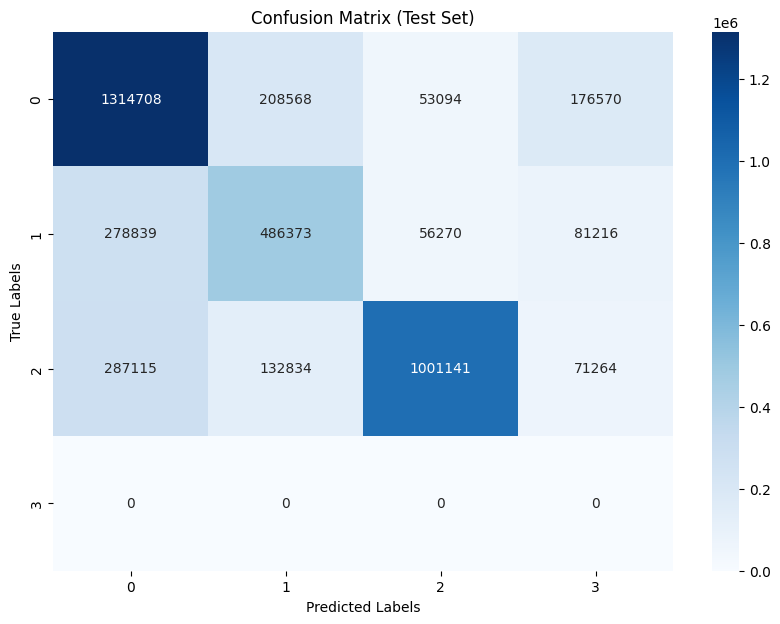

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model
best_model_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\best_rf_balanced_model.pkl"
loaded_model = load(best_model_path)

# Load the test dataset
test_file_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\Testing_Dataset.csv"
df_test = pd.read_csv(test_file_path)

# Prepare test data
X_test = df_test.drop(columns=['IncidentGrade'])
y_test = df_test['IncidentGrade']

# Make predictions using the loaded model
y_test_pred = loaded_model.predict(X_test)

# Calculate and print the evaluation metrics
print("Test Set Results:")
print(f"Macro-F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Precision: {precision_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_test_pred, average='macro'):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()


Loading Test Dataset

In [5]:
import pandas as pd

# File paths
train_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\test_set.csv"
val_output_path = r"D:\Guvi\projects\Microsoft_Cybersecurity_Classification\validation_set.csv"

# Load the datasets
train_data = pd.read_csv(train_output_path)
val_data = pd.read_csv(val_output_path)

# Print the shape of the datasets
print(f"Training dataset shape: {train_data.shape}")
print(f"Validation dataset shape: {val_data.shape}")

# Confirmation message
print("Datasets loaded successfully!")


Training dataset shape: (3318393, 21)
Validation dataset shape: (829599, 21)
Datasets loaded successfully!


Baseline model - Logestic regression on Test Data

Training data loaded with shape: (3318393, 20), Validation data loaded with shape: (829599, 20)
Data sets are loaded.
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.76      0.65    350588
           1       0.54      0.25      0.34    180540
           2       0.68      0.63      0.65    298471

    accuracy                           0.60    829599
   macro avg       0.60      0.55      0.55    829599
weighted avg       0.60      0.60      0.59    829599

Logistic Regression Confusion Matrix:
[[268185  24598  57805]
 [103881  45565  31094]
 [ 96530  14429 187512]]


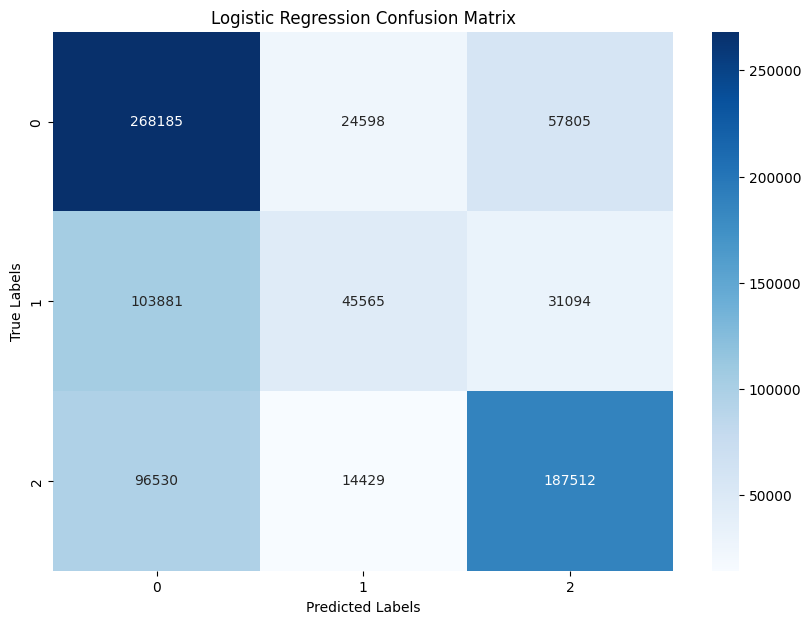

Logistic Regression model training and evaluation complete!


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_val_scaled)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
conf_matrix_log_reg = confusion_matrix(y_val, y_pred_log_reg)
print(conf_matrix_log_reg)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression model training and evaluation complete!")


Baseline model - Decision Tree on Test Data

Training data loaded with shape: (3318393, 20), Validation data loaded with shape: (829599, 20)
Data sets are loaded.
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83    350588
           1       0.80      0.67      0.73    180540
           2       0.88      0.78      0.83    298471

    accuracy                           0.81    829599
   macro avg       0.81      0.78      0.79    829599
weighted avg       0.81      0.81      0.81    829599

Decision Tree Confusion Matrix:
[[315610  17174  17804]
 [ 44705 120762  15073]
 [ 51905  13463 233103]]


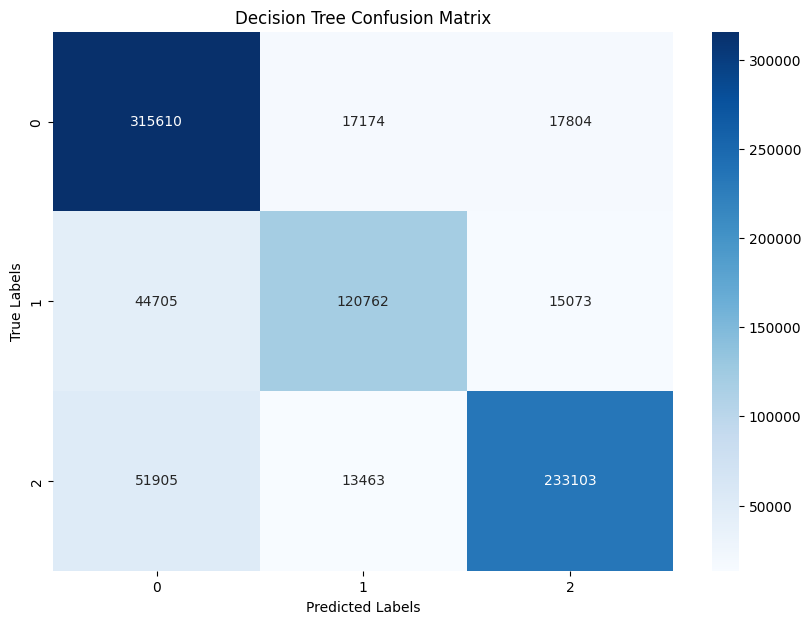

Decision Tree model training and evaluation complete!


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Train Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_val)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

print("Decision Tree Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
print(conf_matrix_dt)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision Tree model training and evaluation complete!")


Comparison of Baseline Models with Advanced model:

Comparison of Model Performance:
                 Model  Accuracy  Macro Avg Precision  Macro Avg Recall  \
0        Random Forest      0.68                0.547            0.4899   
1  Logistic Regression      0.60                0.600            0.5500   
2        Decision Tree      0.81                0.810            0.7800   

   Macro Avg F1-Score  Weighted Avg Precision  Weighted Avg Recall  \
0              0.5138                    0.75                 0.68   
1              0.5500                    0.60                 0.60   
2              0.7900                    0.81                 0.81   

   Weighted Avg F1-Score  
0                   0.70  
1                   0.59  
2                   0.81  


C:\Users\sripathi\AppData\Local\Temp\ipykernel_4016\3136093087.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0], palette="viridis")
C:\Users\sripathi\AppData\Local\Temp\ipykernel_4016\3136093087.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Macro Avg F1-Score', data=df, ax=axes[0, 1], palette="viridis")
C:\Users\sripathi\AppData\Local\Temp\ipykernel_4016\3136093087.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Weighted Avg Precision', data=df, ax=ax

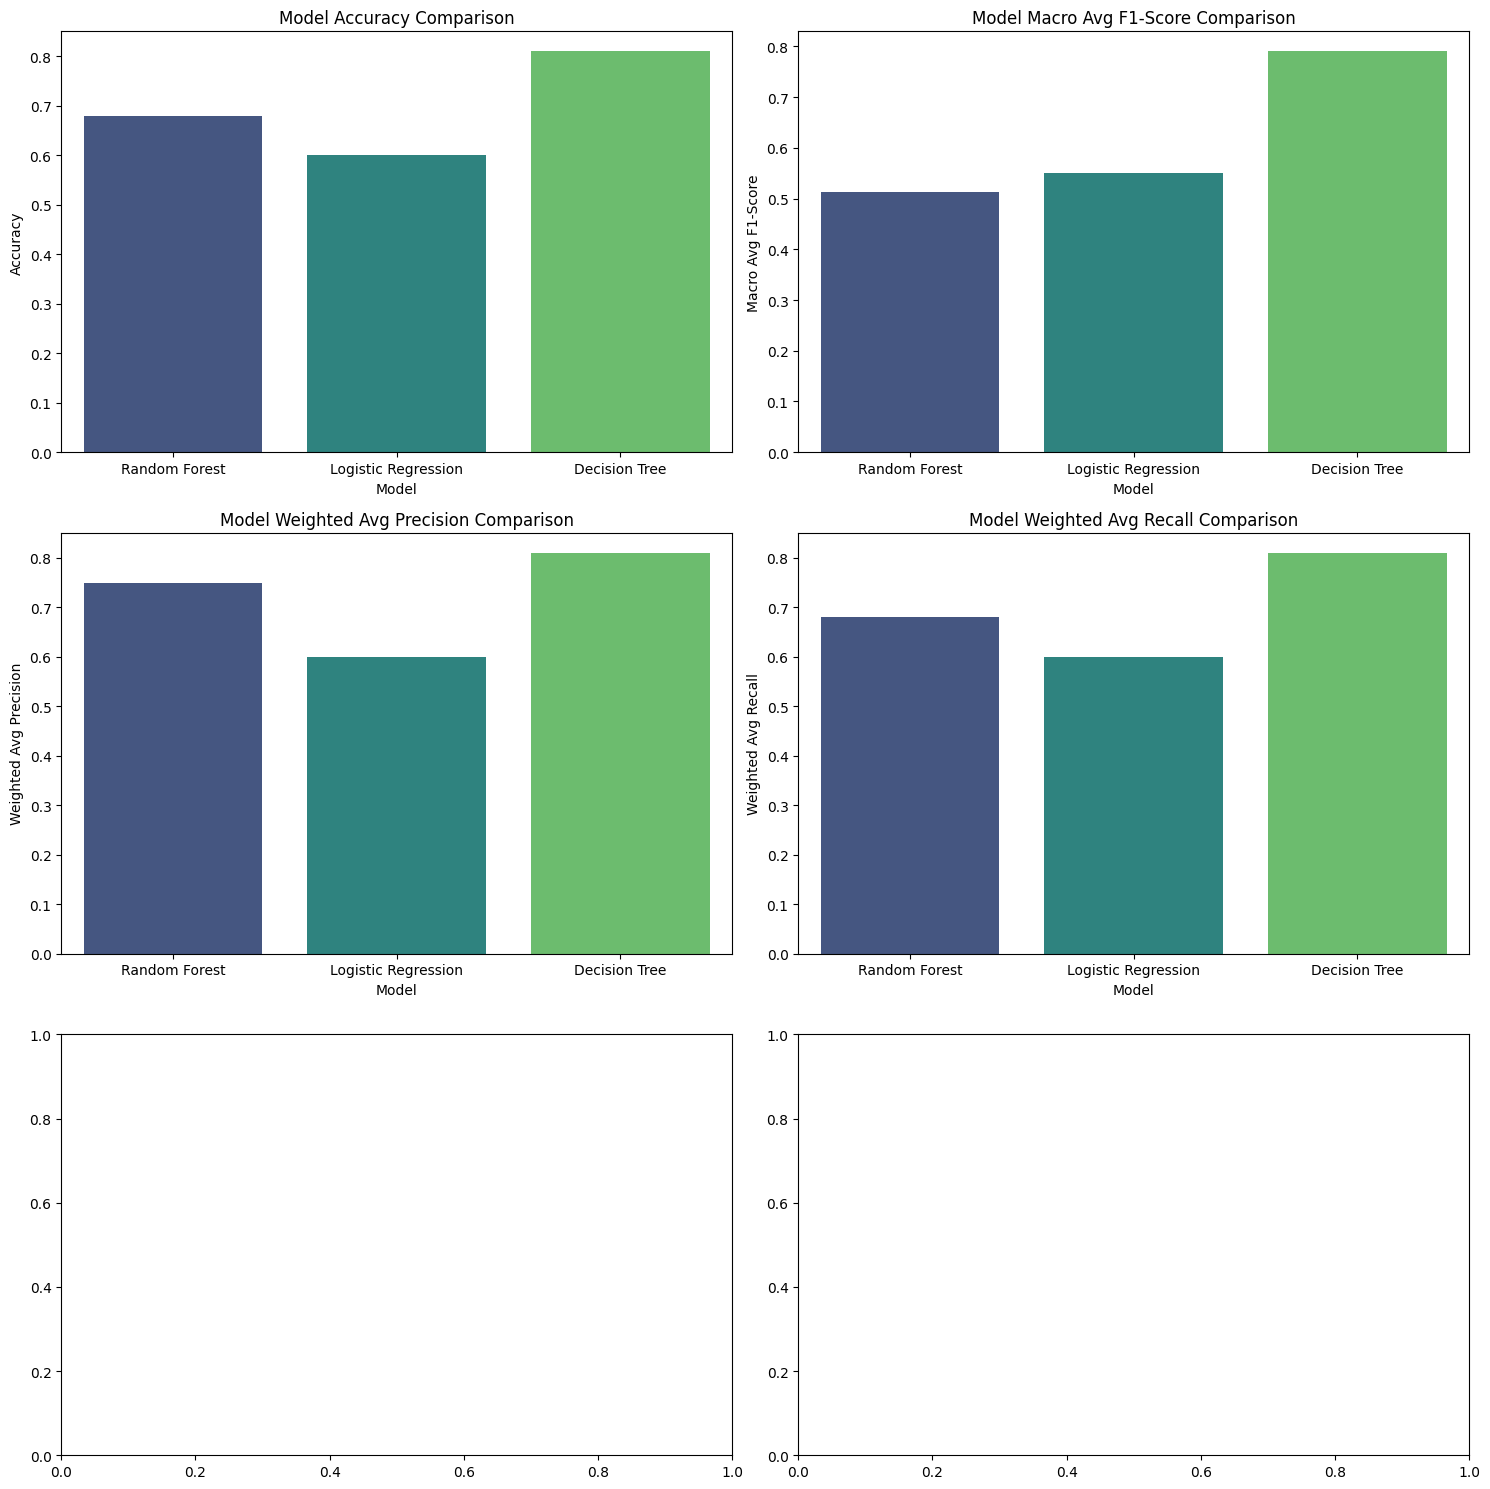

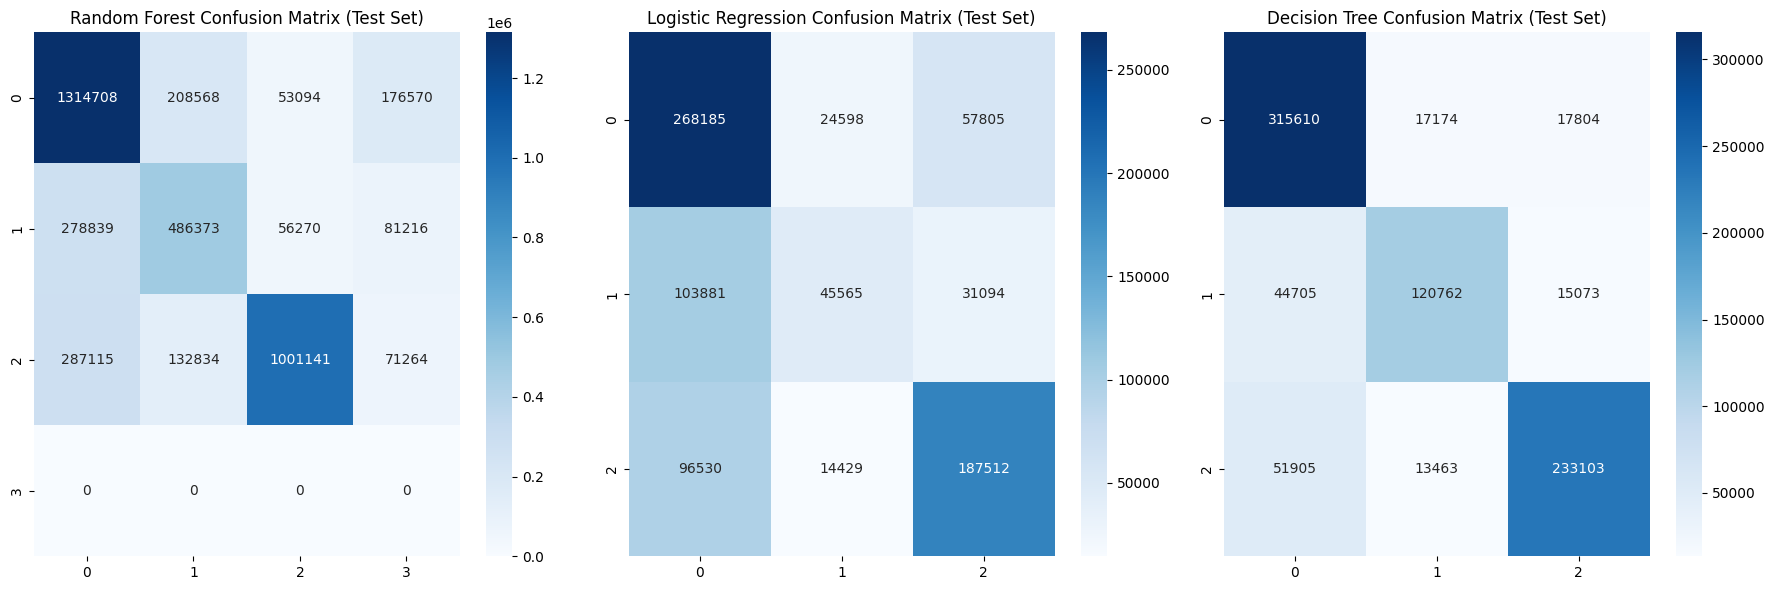

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest results as dictionaries (Updated for test dataset)
random_forest_report = {
    "accuracy": 0.68,
    "macro avg": {"precision": 0.5470, "recall": 0.4899, "f1-score": 0.5138},
    "weighted avg": {"precision": 0.75, "recall": 0.68, "f1-score": 0.70},
    "Confusion Matrix": np.array([[1314708, 208568, 53094, 176570],
                                  [278839, 486373, 56270, 81216],
                                  [287115, 132834, 1001141, 71264],
                                  [0, 0, 0, 0]])
}

# Logistic Regression results as dictionaries (Updated for test dataset)
logistic_regression_report = {
    "accuracy": 0.60,
    "macro avg": {"precision": 0.60, "recall": 0.55, "f1-score": 0.55},
    "weighted avg": {"precision": 0.60, "recall": 0.60, "f1-score": 0.59},
    "Confusion Matrix": np.array([[268185, 24598, 57805],
                                  [103881, 45565, 31094],
                                  [96530, 14429, 187512]])
}

# Decision Tree results as dictionaries (Updated for test dataset)
decision_tree_report = {
    "accuracy": 0.81,
    "macro avg": {"precision": 0.81, "recall": 0.78, "f1-score": 0.79},
    "weighted avg": {"precision": 0.81, "recall": 0.81, "f1-score": 0.81},
    "Confusion Matrix": np.array([[315610, 17174, 17804],
                                  [44705, 120762, 15073],
                                  [51905, 13463, 233103]])
}

# Creating a DataFrame for better visualization
data = {
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree"],
    "Accuracy": [random_forest_report["accuracy"], logistic_regression_report["accuracy"], decision_tree_report["accuracy"]],
    "Macro Avg Precision": [random_forest_report["macro avg"]["precision"], logistic_regression_report["macro avg"]["precision"], decision_tree_report["macro avg"]["precision"]],
    "Macro Avg Recall": [random_forest_report["macro avg"]["recall"], logistic_regression_report["macro avg"]["recall"], decision_tree_report["macro avg"]["recall"]],
    "Macro Avg F1-Score": [random_forest_report["macro avg"]["f1-score"], logistic_regression_report["macro avg"]["f1-score"], decision_tree_report["macro avg"]["f1-score"]],
    "Weighted Avg Precision": [random_forest_report["weighted avg"]["precision"], logistic_regression_report["weighted avg"]["precision"], decision_tree_report["weighted avg"]["precision"]],
    "Weighted Avg Recall": [random_forest_report["weighted avg"]["recall"], logistic_regression_report["weighted avg"]["recall"], decision_tree_report["weighted avg"]["recall"]],
    "Weighted Avg F1-Score": [random_forest_report["weighted avg"]["f1-score"], logistic_regression_report["weighted avg"]["f1-score"], decision_tree_report["weighted avg"]["f1-score"]]
}

df = pd.DataFrame(data)

# Print the DataFrame to compare
print("Comparison of Model Performance:")
print(df)

# Visualization using matplotlib and seaborn

# Create subplots for each metric category
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Accuracy
sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Model Accuracy Comparison')

# Macro Avg F1-Score
sns.barplot(x='Model', y='Macro Avg F1-Score', data=df, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Model Macro Avg F1-Score Comparison')

# Weighted Avg Precision
sns.barplot(x='Model', y='Weighted Avg Precision', data=df, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Model Weighted Avg Precision Comparison')

# Weighted Avg Recall
sns.barplot(x='Model', y='Weighted Avg Recall', data=df, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Model Weighted Avg Recall Comparison')

plt.tight_layout()
plt.show()

# Confusion Matrix Heatmaps
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(random_forest_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix (Test Set)')

sns.heatmap(logistic_regression_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression Confusion Matrix (Test Set)')

sns.heatmap(decision_tree_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Decision Tree Confusion Matrix (Test Set)')

plt.tight_layout()
plt.show()
